In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [9]:
path = "C:/Users/JOHNNY/Documents/Untitled Folder/" 
data_train = pd.read_csv(path + "train.csv")

In [11]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [12]:
data_train.shape

(14999, 9)

In [19]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [20]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [22]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [23]:
column_vidid=data_train['vidid']

In [24]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [25]:
# Convert Time_in_sec for duration
import datetime
import time

In [28]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)


In [31]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)

In [32]:
data_train["duration"]=time1


In [33]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


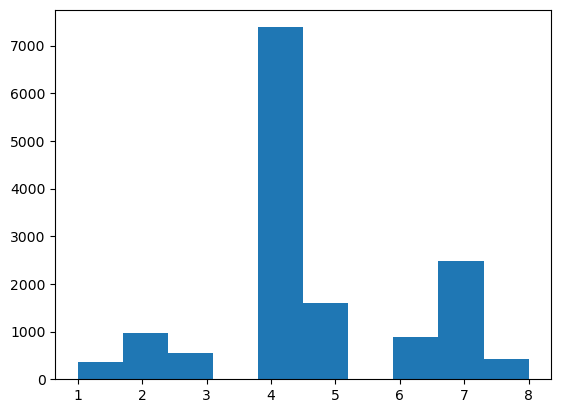

In [34]:
plt.hist(data_train["category"])
plt.show()


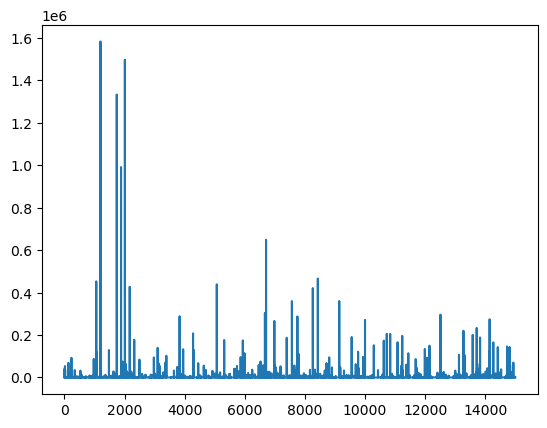

In [35]:
plt.plot(data_train["adview"])
plt.show()


In [36]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

C:\Users\JOHNNY\AppData\Local\Temp\ipykernel_4992\3573078026.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


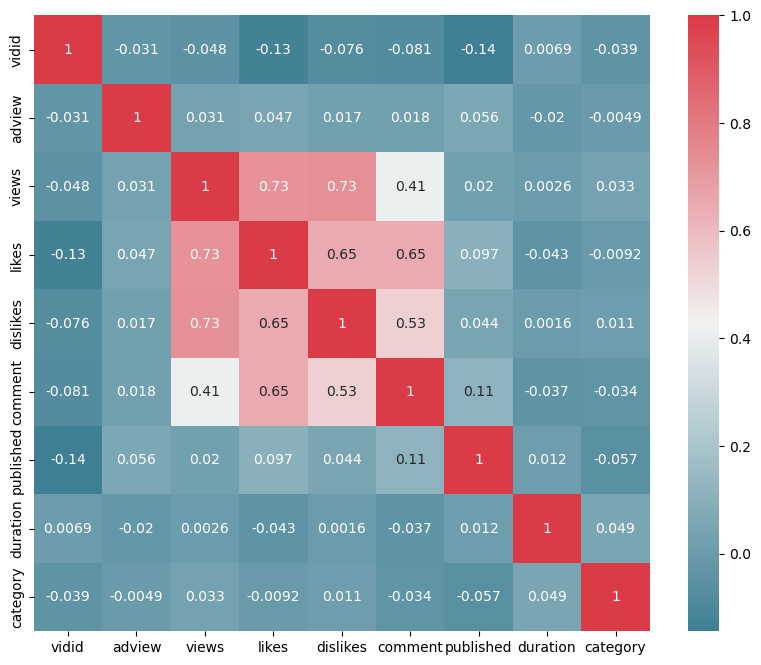

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [38]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()


,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape


(11708, 7)

In [41]:
X_train

,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,1217,180,4
9523,1419766,887,362,232,1547,5811,7
3012,26086,19,0,9,966,178,6
1888,305445,3662,45,555,1484,257,7
11378,737649,1702,96,53,1127,895,4
...,...,...,...,...,...,...,...
5316,31648,140,24,14,1925,231,7
13748,1804,4,1,0,1049,232,4
5522,204817,86,35,11,1237,218,4
883,1361366,1384,757,185,2145,240,7


In [42]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [45]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [46]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [47]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [48]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2870.187158469945
Mean Squared Error: 1199777132.3469946
Root Mean Squared Error: 34637.799184517986


In [51]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\JOHNNY\AppData\Local\Temp\ipykernel_4992\3179977126.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3311.109108673185
Mean Squared Error: 625359416.8018799
Root Mean Squared Error: 25007.18730289114


In [53]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=X_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [54]:
history=ann.fit(X_train,y_train,epochs=100)


Epoch 1/100
366/366 [==============================] - 54s 66ms/step - loss: 767406208.0000 - mean_squared_error: 767406208.0000
Epoch 2/100
366/366 [==============================] - 22s 59ms/step - loss: 767401856.0000 - mean_squared_error: 767401856.0000
Epoch 3/100
366/366 [==============================] - 21s 57ms/step - loss: 767391168.0000 - mean_squared_error: 767391168.0000
Epoch 4/100
366/366 [==============================] - 19s 52ms/step - loss: 767373056.0000 - mean_squared_error: 767373056.0000
Epoch 5/100
366/366 [==============================] - 18s 48ms/step - loss: 767337344.0000 - mean_squared_error: 767337344.0000
Epoch 6/100
366/366 [==============================] - 27s 74ms/step - loss: 767276032.0000 - mean_squared_error: 767276032.0000
Epoch 7/100
366/366 [==============================] - 23s 63ms/step - loss: 767196800.0000 - mean_squared_error: 767196800.0000
Epoch 8/100
366/366 [==============================] - 23s 64ms/step - loss: 767105280.0000 - mea

366/366 [==============================] - 4s 10ms/step - loss: 763446272.0000 - mean_squared_error: 763446272.0000
Epoch 65/100
366/366 [==============================] - 5s 13ms/step - loss: 763429440.0000 - mean_squared_error: 763429440.0000
Epoch 66/100
366/366 [==============================] - 4s 10ms/step - loss: 763411392.0000 - mean_squared_error: 763411392.0000
Epoch 67/100
366/366 [==============================] - 4s 10ms/step - loss: 763394496.0000 - mean_squared_error: 763394496.0000
Epoch 68/100
366/366 [==============================] - 4s 10ms/step - loss: 763377984.0000 - mean_squared_error: 763377984.0000
Epoch 69/100
366/366 [==============================] - 4s 10ms/step - loss: 763359488.0000 - mean_squared_error: 763359488.0000
Epoch 70/100
366/366 [==============================] - 4s 11ms/step - loss: 763340288.0000 - mean_squared_error: 763340288.0000
Epoch 71/100
366/366 [==============================] - 4s 12ms/step - loss: 763323008.0000 - mean_squared_err

In [55]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 48        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [56]:
print_error(X_test,y_test,ann)

92/92 [==============================] - 1s 5ms/step
Mean Absolute Error: 3178.9402296039902
Mean Squared Error: 829011032.3206655
Root Mean Squared Error: 28792.551681305802


In [57]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")


In [58]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")